# Analysis on Chicago Rideshare

## 1. Introduction
On this notebook we will analyse the data on ridesharing in the year 2022 in the city of Chicago, which can be found [here](https://data.cityofchicago.org/Transportation/Transportation-Network-Providers-Trips/m6dm-c72p/data).

We will perform an Exploratory Data Analysis and we will focus on three main topics:
- The `tip` feature. We will try to identify when and where should a driver drive in order to miximize the probability of being tipped.
- Calculate the mean daily rides with a 95% confidence interval
- Hypothesis testing to figure out whether there are more rides on Fridays and Saturdays than the rest of the days

The dataset under study consists on 691098 rows of data with 22 columns of features.

For each ride the following features have been recorded:

- `Trip ID`: A unique identifier for the trip.


- `Trip Start Timestamp`: When the trip started, rounded to the nearest 15 minutes.


- `Trip End Timestamp`: When the trip ended, rounded to the nearest 15 minutes.


- `Trip Seconds`: Time of the trip in seconds.


- `Trip Miles`: Distance of the trip in miles.


- `Pickup Census Tract`: The Census Tract where the trip began. This column often will be blank for locations outside Chicago.


- `Dropoff Census Tract`: The Census Tract where the trip ended. This column often will be blank for locations outside Chicago.


- `Pickup Community Area`: The Community Area where the trip began. This column will be blank for locations outside Chicago.


- `Dropoff Community Area`: The Community Area where the trip ended. This column will be blank for locations outside Chicago.


- `Fare`: The fare for the trip, rounded to the nearest $2.50. 


- `Tip`: The tip for the trip, rounded to the nearest $1.00. Cash tips will not be recorded.


- `Additional Charges`: The taxes, fees, and any other charges for the trip.


- `Trip Total`: Total cost of the trip. This is calculated as the total of the previous columns, including rounding.


- `Shared Trip Authorized`: Whether the customer agreed to a shared trip with another customer, regardless of whether the customer was actually matched for a shared trip.


- `Trips Pooled`: If customers were matched for a shared trip, how many trips, including this one, were pooled. All customer trips from the time the vehicle was empty until it was empty again contribute to this count, even if some customers were never present in the vehicle at the same time. Each trip making up the overall shared trip will have a separate record in this dataset, with the same value in this column.


- `Pickup Centroid Latitude`: The latitude of the center of the pickup census tract or the community area if the census tract has been hidden for privacy. This column often will be blank for locations outside Chicago.


- `Pickup Centroid Longitude`: The longitude of the center of the pickup census tract or the community area if the census tract has been hidden for privacy. This column often will be blank for locations outside Chicago.


- `Pickup Centroid Location`: The location of the center of the pickup census tract or the community area if the census tract has been hidden for privacy. This column often will be blank for locations outside Chicago.


- `Dropoff Centroid Latitude`: The latitude of the center of the dropoff census tract or the community area if the census tract has been hidden for privacy. This column often will be blank for locations outside Chicago.


- `Dropoff Centroid Longitude`: The longitude of the center of the dropoff census tract or the community area if the census tract has been hidden for privacy. This column often will be blank for locations outside Chicago.


- `Dropoff Centroid Location`: The location of the center of the dropoff census tract or the community area if the census tract has been hidden for privacy. This column often will be blank for locations outside Chicago.

#### Import libraries

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import folium 
from folium.plugins import FastMarkerCluster

import scipy
import statsmodels.formula.api as smf

## 2. Load dataset and general overview

In [77]:
# Load dataset
df = pd.read_csv("data/rideshare_2022.csv", parse_dates=['Trip Start Timestamp', 'Trip End Timestamp'])

# Visual exploration
df.head()

Trip ID Trip Start Timestamp  \
0  04767642defd6a3825d089ae66183906a89b902d           2022-01-01   
1  138de88e19e045d9962f1f669e668f9dcdfbc9fd           2022-01-01   
2  249cb7bc8eea309aaa3ef941756df4f62a53a92a           2022-01-01   
3  36c8a2a4cd85fb32ae32170550d2a4d30b8df8a1           2022-01-01   
4  493f7bbcba1d96bf10bd579fe1c4b7ddb95fd3a6           2022-01-01   

   Trip End Timestamp  Trip Seconds  Trip Miles  Pickup Census Tract  \
0 2022-01-01 01:15:00        3905.0        44.5         1.703104e+10   
1 2022-01-01 00:30:00        2299.0        25.0                  NaN   
2 2022-01-01 00:00:00         275.0         1.5                  NaN   
3 2022-01-01 00:15:00         243.0         1.0         1.703106e+10   
4 2022-01-01 00:15:00         364.0         1.3         1.703107e+10   

   Dropoff Census Tract  Pickup Community Area  Dropoff Community Area  Fare  \
0                   NaN                    4.0                     NaN  55.0   
1                   NaN                   32.0                     NaN  32.5   
2                   NaN                   40.0                    38.0   7.5   
3          1.703106e+10                    6.0                     6.0   5.0   
4          1.703106e+10                    7.0                     6.0   5.0   

   ...  Trip Total  Shared Trip Authorized  Trips Pooled  \
0  ...       66.25                       0             1   
1  ...       46.68                       0             1   
2  ...        8.52                       0             1   
3  ...        7.36                       0             1   
4  ...        7.36                       0             1   

   Pickup Centroid Latitude  Pickup Centroid Longitude  \
0                 41.972563                 -87.678846   
1                 41.878866                 -87.625192   
2                 41.792357                 -87.617931   
3                 41.936310                 -87.651563   
4                 41.921855                 -87.646211   

               Pickup Centroid Location  Dropoff Centroid Latitude  \
0  POINT (-87.6788459662 41.9725625375)                        NaN   
1  POINT (-87.6251921424 41.8788655841)                        NaN   
2  POINT (-87.6179313803 41.7923572233)                  41.812949   
3  POINT (-87.6515625922 41.9363101308)                  41.943155   
4  POINT (-87.6462109769 41.9218549112)                  41.936237   

  Dropoff Centroid Longitude             Dropoff Centroid Location  len_date  
0                        NaN                                   NaN        16  
1                        NaN                                   NaN        16  
2                 -87.617860  POINT (-87.6178596758 41.8129489392)        16  
3                 -87.640698   POINT (-87.640698076 41.9431550855)        16  
4                 -87.656412  POINT (-87.6564115308 41.9362371791)        16  

[5 rows x 22 columns]

In [78]:
# Info on non-null values and dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 691098 entries, 0 to 691097
Data columns (total 22 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   Trip ID                     691098 non-null  object        
 1   Trip Start Timestamp        691098 non-null  datetime64[ns]
 2   Trip End Timestamp          691098 non-null  datetime64[ns]
 3   Trip Seconds                691073 non-null  float64       
 4   Trip Miles                  691096 non-null  float64       
 5   Pickup Census Tract         398943 non-null  float64       
 6   Dropoff Census Tract        397574 non-null  float64       
 7   Pickup Community Area       633092 non-null  float64       
 8   Dropoff Community Area      630431 non-null  float64       
 9   Fare                        689952 non-null  float64       
 10  Tip                         689952 non-null  float64       
 11  Additional Charges          689952 non-

We select only the columns which are of interest tu our analysis. 
We will also create a column containing the date.

In [79]:
columns_of_interest = ['Trip Start Timestamp', 'Trip Seconds',
       'Trip Miles', 'Fare', 'Tip', 'Additional Charges', 'Trip Total', 'Shared Trip Authorized',
       'Trips Pooled', 'Pickup Centroid Latitude', 'Pickup Centroid Longitude', 'Dropoff Centroid Latitude',
       'Dropoff Centroid Longitude']

df = df[columns_of_interest]

# Rename all the columns to not include whitespace
df = df.rename(columns={i: "_".join(i.split(" ")).lower() for i in df.columns})

# Create date column
df['date'] = pd.to_datetime(df['trip_start_timestamp'].dt.date)

# Check the info on the cleaned-up dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 691098 entries, 0 to 691097
Data columns (total 14 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   trip_start_timestamp        691098 non-null  datetime64[ns]
 1   trip_seconds                691073 non-null  float64       
 2   trip_miles                  691096 non-null  float64       
 3   fare                        689952 non-null  float64       
 4   tip                         689952 non-null  float64       
 5   additional_charges          689952 non-null  float64       
 6   trip_total                  689952 non-null  float64       
 7   shared_trip_authorized      691098 non-null  int64         
 8   trips_pooled                691098 non-null  int64         
 9   pickup_centroid_latitude    635075 non-null  float64       
 10  pickup_centroid_longitude   635075 non-null  float64       
 11  dropoff_centroid_latitude   632163 non-

In [80]:
df.describe()

trip_start_timestamp   trip_seconds     trip_miles  \
count                         691098  691073.000000  691096.000000   
mean   2022-07-09 12:13:17.168419328    1089.008338       6.941224   
min              2022-01-01 00:00:00       1.000000       0.000000   
25%              2022-04-11 11:45:00     543.000000       2.000000   
50%              2022-07-12 09:45:00     880.000000       4.100000   
75%              2022-10-08 19:30:00    1416.000000       9.200000   
max              2022-12-31 12:45:00   34892.000000     366.900000   
std                              NaN     782.835520       7.773458   

                fare            tip  additional_charges     trip_total  \
count  689952.000000  689952.000000       689952.000000  689952.000000   
mean       18.577024       1.264072            4.694999      24.536095   
min         0.000000       0.000000            0.000000       0.000000   
25%        10.000000       0.000000            2.490000      13.440000   
50%        15.000000       0.000000            3.550000      19.020000   
75%        22.500000       1.000000            5.460000      29.490000   
max       637.500000     100.000000          253.010000     656.750000   
std        14.069854       2.923235            4.314872      17.627719   

       shared_trip_authorized   trips_pooled  pickup_centroid_latitude  \
count           691098.000000  691098.000000             635075.000000   
mean                 0.022537       1.010250                 41.889642   
min                  0.000000       1.000000                 41.650222   
25%                  0.000000       1.000000                 41.871016   
50%                  0.000000       1.000000                 41.893216   
75%                  0.000000       1.000000                 41.934762   
max                  1.000000       5.000000                 42.021224   
std                  0.148421       0.113987                  0.067517   

       pickup_centroid_longitude  dropoff_centroid_latitude  \
count              635075.000000              632163.000000   
mean                  -87.671920                  41.890190   
min                   -87.913625                  41.650222   
25%                   -87.689319                  41.871016   
50%                   -87.654093                  41.893216   
75%                   -87.631407                  41.935706   
max                   -87.530712                  42.021224   
std                     0.070488                   0.067239   

       dropoff_centroid_longitude                           date  
count               632163.000000                         691098  
mean                   -87.674246  2022-07-09 02:16:40.835192832  
min                    -87.913625            2022-01-01 00:00:00  
25%                    -87.691430            2022-04-11 00:00:00  
50%                    -87.654007            2022-07-12 00:00:00  
75%                    -87.631407            2022-10-08 00:00:00  
max                    -87.530712            2022-12-31 00:00:00  
std                      0.075001                            NaN

Surprisingly there are null values on `trip_miles` and on `fare`. Also we find trips that lasted only 1 second. These values should be cleaned.

Now we check the number of missing data

In [81]:
# Define function for detecting missing data
def missing_data(df):
    na = df.isna().sum().sort_values(ascending=False)
    na_percent = (df.isna().sum()/df.isna().count()
                  ).sort_values(ascending=False)
    missing = pd.concat([na, na_percent], axis=1,
                        keys=['Total_NaN', 'Percent_Nan'])
    return missing

# apply function
missing_data(df)

Total_NaN  Percent_Nan
dropoff_centroid_latitude       58935     0.085277
dropoff_centroid_longitude      58935     0.085277
pickup_centroid_latitude        56023     0.081064
pickup_centroid_longitude       56023     0.081064
fare                             1146     0.001658
tip                              1146     0.001658
additional_charges               1146     0.001658
trip_total                       1146     0.001658
trip_seconds                       25     0.000036
trip_miles                          2     0.000003
trip_start_timestamp                0     0.000000
shared_trip_authorized              0     0.000000
trips_pooled                        0     0.000000
date                                0     0.000000

All NaN values in location features represent places outside Chicago. The can be left like that. On the other hand the number of missing values in `fare`, `tip`, `additional_charges`, `trip_total`, `trip_seconds` and `trip_miles` are small, so we remove them. 

In [82]:
# Get indexes to keep
idx = df[['fare', 'tip', 'additional_charges', 'trip_total', 'trip_seconds', 'trip_miles']].dropna().index

# Keep only the selected indexes
df = df.iloc[idx, :]

# Analyce new missing data
missing_data(df)

Total_NaN  Percent_Nan
dropoff_centroid_latitude       58846     0.085293
dropoff_centroid_longitude      58846     0.085293
pickup_centroid_latitude        55939     0.081080
pickup_centroid_longitude       55939     0.081080
trip_start_timestamp                0     0.000000
trip_seconds                        0     0.000000
trip_miles                          0     0.000000
fare                                0     0.000000
tip                                 0     0.000000
additional_charges                  0     0.000000
trip_total                          0     0.000000
shared_trip_authorized              0     0.000000
trips_pooled                        0     0.000000
date                                0     0.000000

Now we have fixed the missing values we are ready to perform our EDA

## 3. Exploratory Data Analysis

#### What is the distribution of rides in time?

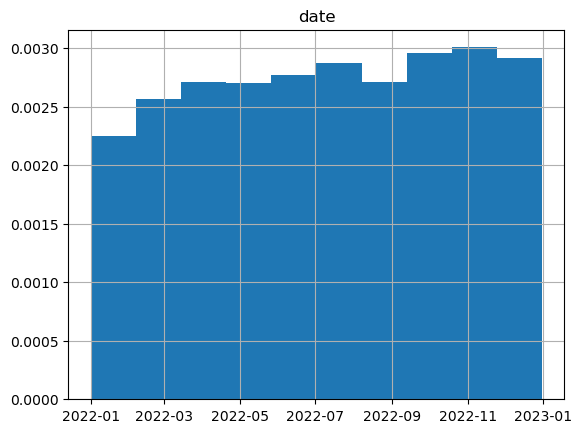

In [83]:
# plot dates histogram
df.hist('date', density=True);

There are less rides on early days, but in general the **number of rides are quite uniformly distributed throughout the year**.

#### What is the tips distribution?

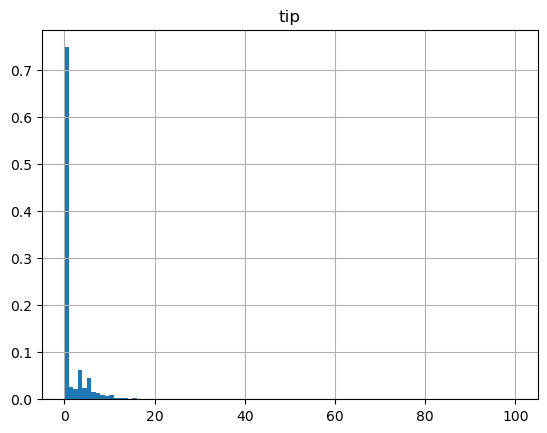

In [84]:
df.hist('tip', density=True, bins=100);

We see that most people do not tip and it is difficult to see the distribution of tippers. 

#### Which fraction of people actually tip?

In [85]:
# Number of tippers
tippers = df['tip'] > 0
number_of_tippers = tippers.sum()

# Total number of rides
total_rides = len(df)

# Calculate the fraction of people who tip
fraction_of_tippers = number_of_tippers / total_rides
print(f'The percentage of riders who tip is {fraction_of_tippers*100:.0f}%.')

The percentage of riders who tip is 25%.


Only a 25% of riders actually tip. If we were a driver we would like to maximize the number of tips we get. Further on this notebook we will try to shed light on the conditions which may give us a higher probability of being tipped and therefore maximize our incomes.

#### Which is the distribution of non-cero tips?

Mean tip: 5.0


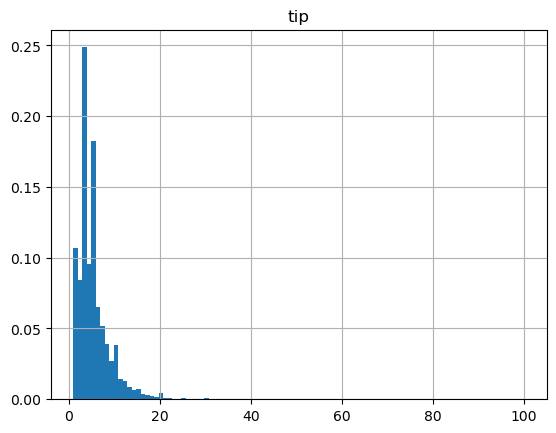

In [86]:
# Tippers Dataframe
df_tippers = df[tippers]

# Calculate the mean value of tips
print(f"Mean tip: {df_tippers.tip.mean():.2}")

# Distribution of tippers tips
df_tippers.hist('tip', density=True, bins = 100);

We observe a long right tail on this distribution and most tips are below 10$. The mean value of tips is 5$

#### When can we get higher tips?

Let's start splitting by day of the week.

In [87]:
# Count the number of rides each day
df['weekday'] = df["date"].dt.day_name()
daily_ride_counts = df['weekday'].value_counts()

# Reorder the series given weekdays
WEEKDAYS = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_ride_counts = daily_ride_counts.reindex(WEEKDAYS)

# Count the number of tips given each day
df_tippers = df[df['tip'] > 0]
daily_tippers_counts = df_tippers['weekday'].value_counts()

# Reorder the series
daily_tippers_counts = daily_tippers_counts.reindex(WEEKDAYS)

# Create dataframe with daily rides, tippers and percentage of tippers
df_daily_aggregation = pd.concat([daily_ride_counts, daily_tippers_counts], axis=1, keys=['ride_count', 'tippers_count'])
df_daily_aggregation["tips_percentage"] = df_daily_aggregation['tippers_count'] / df_daily_aggregation['ride_count'] * 100

df_daily_aggregation

ride_count  tippers_count  tips_percentage
weekday                                              
Monday          78922          19779        25.061453
Tuesday         82479          20898        25.337359
Wednesday       87749          22691        25.858984
Thursday        95560          24209        25.333822
Friday         115729          29256        25.279748
Saturday       132688          33215        25.032407
Sunday          96798          23287        24.057315

We see that there are significantly more rides on Fridays and Saturdays than on the other days of the week. The percentage of given tips remains more or less constant.

Now we may wonder, **is there any day of the week were tips are higher?**

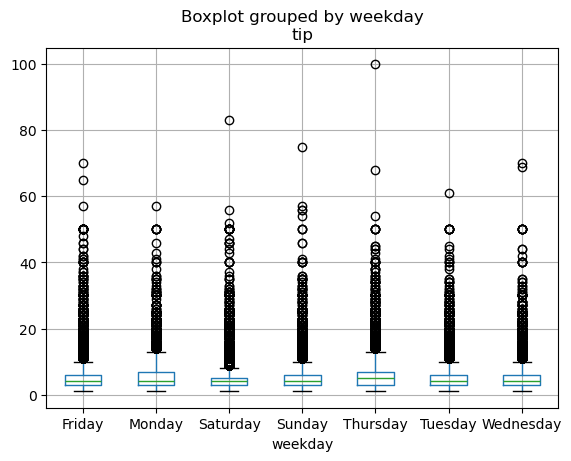

In [88]:
# Boxplot for tip values on weekday 
df_tippers.boxplot('tip', by='weekday');

The day of the week does not seem to affect significatively to the tips values.

Now we wonder, **is there a higher chance of getting tipped at a certain hour?**
We look at the tips given at different hours of day. 

<Figure size 640x480 with 0 Axes>

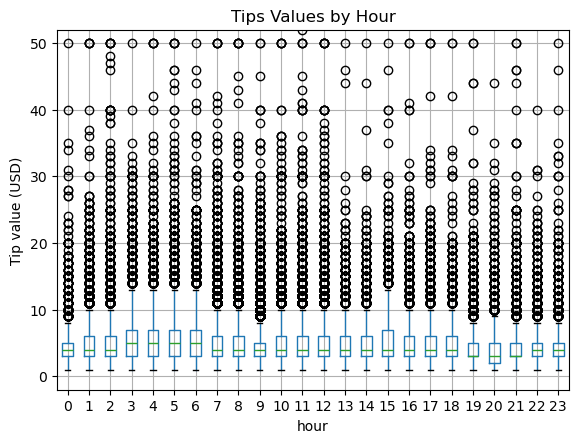

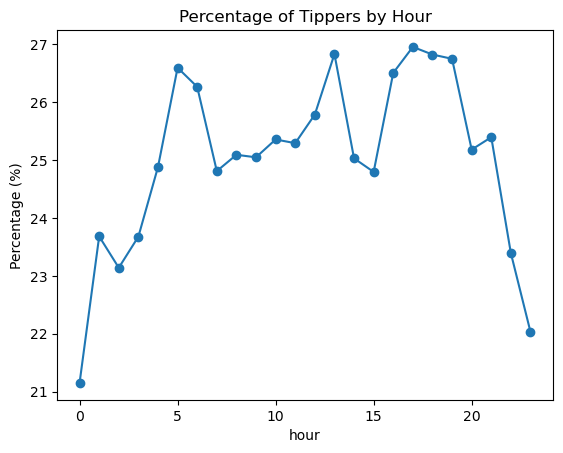

In [89]:
# Column for the hour of day
df["hour"] = df["trip_start_timestamp"].apply(lambda x: x.hour)
# Select only the tippers
df_tippers = df[df['tip'] > 0]

# Boxplot
plt.figure()
df_tippers.boxplot(column='tip', by='hour')
plt.ylim(-2, 52)
plt.ylabel("Tip value (USD)")
plt.title("Tips Values by Hour")
plt.suptitle("")

# Calculate the percentage of tippers
percentage_of_tippers_hourly = df_tippers.groupby(["hour"])["tip"].count() / df.groupby(["hour"])["tip"].count() * 100

# Plot the percentage of tippers
plt.figure();
percentage_of_tippers_hourly.plot(marker="o", title="Percentage of Tippers by Hour");
plt.ylabel("Percentage (%)");

**We find more tippers in the early morning and from 15 to 18 hours.**

It seems like the tips are slightly higher in the morning hours. But why would the tips be higher in the early morning? Maybe this has to do with the hour of day, perhaps people feel more empathy in the morning. 

Before rushing to a conclusion, let's see if there is other explanation.

### Trip miles
Let's look at the length of the trips by hour.

Text(0, 0.5, 'Trip length (miles)')

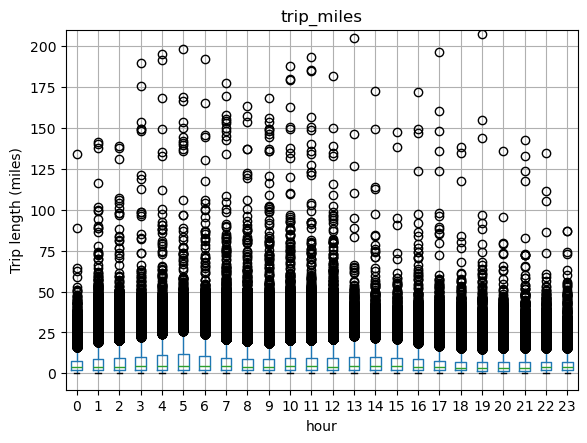

In [90]:
df.boxplot(column='trip_miles', by='hour')
plt.ylim(-10, 210);
plt.suptitle("");
plt.ylabel("Trip length (miles)")

Trips seem to be longer in the early morning. These are also the hours when tips values are higher. These two variables might be correlated.

Correlation between trip miles and tips is: 0.637


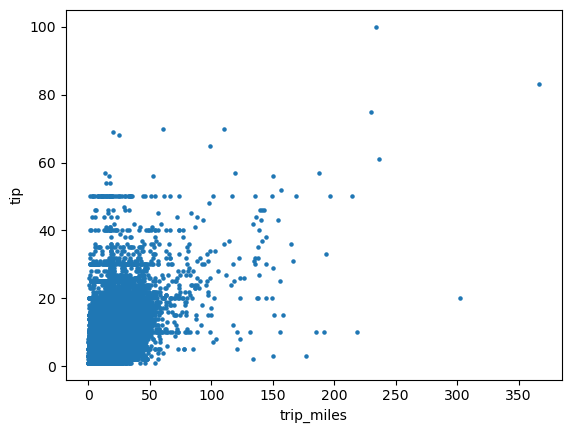

In [91]:
# Create scatterplot
df_tippers.plot(kind='scatter', x='trip_miles', y='tip', marker=".")

# Calculate correlation
tip_miles_correlation = (df_tippers.tip).corr(df_tippers.trip_miles)
print(f'Correlation between trip miles and tips is: {tip_miles_correlation:.3}')

We find a moderate correlation between the variables. This correlation makes sense, as longer rides also cost more and thus the tips are likely to be higher. 

Let's explore the correlation between tips and fare.

Correlation between fare and tips is: 0.751


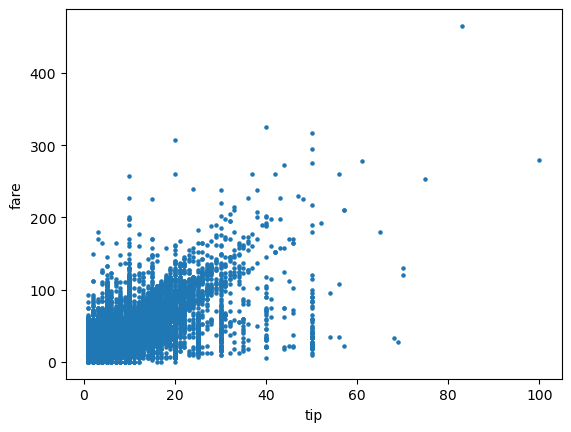

In [92]:
# Create scatterplot
df_tippers.plot(kind='scatter', x='tip', y='fare', marker=".")

# Calculate correlation
tip_fare_correlation = (df_tippers.tip).corr(df_tippers.fare)
print(f'Correlation between fare and tips is: {tip_fare_correlation:.3}')

We see a stronger positive correlation beetwen tips and fares. So **for higher fares we get higher tips.**

### Where rides usually start?

We are also interested in knowing where the trips usually start. We plot a 2D histogram using centroid latitude and longitude.

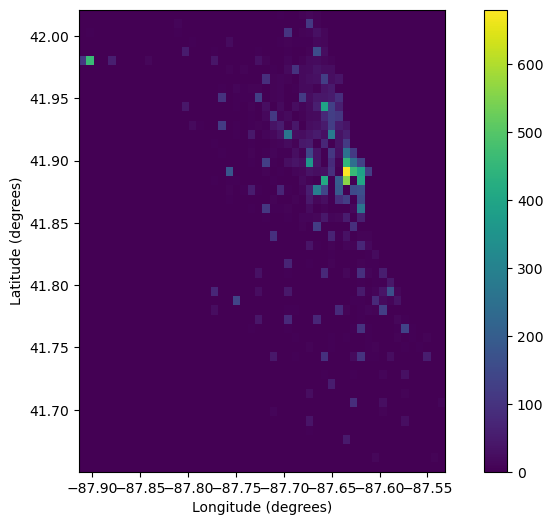

In [93]:
# Select the columns you want to plot
latitude = df.dropna()["pickup_centroid_latitude"].to_numpy()
longitude = df.dropna()["pickup_centroid_longitude"].to_numpy()
# Plot the 2D histogram
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
hist = ax.hist2d(longitude, latitude, bins=50, density=True)
ax.set_aspect(1.3, "box")
fig.colorbar(hist[3])
ax.set_xlabel("Longitude (degrees)")
ax.set_ylabel("Latitude (degrees)");

Looking at the distribution, it seems there are many rides in the middle right of the plot, which is likely to be downtown Chicago. We observe also a quite big concurrence in the top left corner, very far away from everything else.

We check the locations on the map to see where the majority of the points are and what the location in the upper left could be.

In [94]:
# Define the function for plotting an interactive map
def interactive_map(df, n_samples=10000):
    
    # We take only n_samples to ensure the map renders quickly enough.
    points = df[["pickup_centroid_longitude", "pickup_centroid_latitude"]].dropna()[0:n_samples]
    
    latitude = points.iloc[0]["pickup_centroid_latitude"]
    longitude = points.iloc[0]["pickup_centroid_longitude"]
    
    map3 = folium.Map(location=[latitude, longitude], zoom_start=9)

    marker_cluster = FastMarkerCluster([]).add_to(map3)
    
    for index, row in points.iterrows():
        latitude = row["pickup_centroid_latitude"]
        longitude = row["pickup_centroid_longitude"]
        folium.Marker((latitude, longitude), icon=folium.Icon(color="green")).add_to(marker_cluster)

    return map3

# Run the function
interactive_map(df)

We observe that the rides from the top left corner come from the Chicago O'Hare International Airport.

#### Is the Chicago O'Hare International Airport a good place to get tips as a driver?

Mean tip: 8.9


<Figure size 640x480 with 0 Axes>

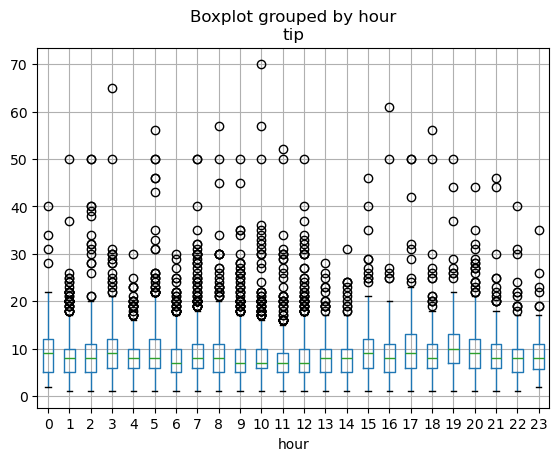

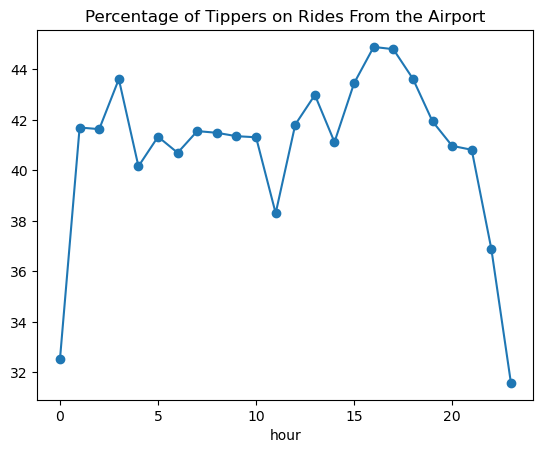

In [95]:
# Select all of the rides starting at the airport
airport_rides = df[
    (df["pickup_centroid_longitude"] < -87.9) &
    (df["pickup_centroid_latitude"] > 41.97) &
    (df["pickup_centroid_latitude"] < 41.99)
]

airport_df_tippers = airport_rides[airport_rides['tip'] > 0]

# Calculate the mean value of tips
print(f"Mean tip: {airport_df_tippers.tip.mean():.2}")

# Plot the boxplot of tips for each hour
plt.figure();
airport_df_tippers.boxplot(column='tip', by='hour');

# Calculate the percentage of tippers
airport_tippers_hourly = airport_df_tippers.groupby(["hour"])["tip"].count() / airport_rides.groupby(["hour"])["tip"].count() * 100

# Plot the percentage of tippers
plt.figure();
airport_tippers_hourly.plot(marker="o", title="Percentage of Tippers on Rides From the Airport");

**For the rides that start at the airport the percentage of the people who tip is much higher. Also the mean value of the tips is higher.**

Looks like this is a good place to be as a driver!

## 4. Mean daily rides. Confidence Interval.

Our aim is to calculate the mean number of rides on a day. This data is only a sample of the total population of cab rides in Chicago and everything we get here will be just an estimation of the true population.
We start by plotting the daily rides

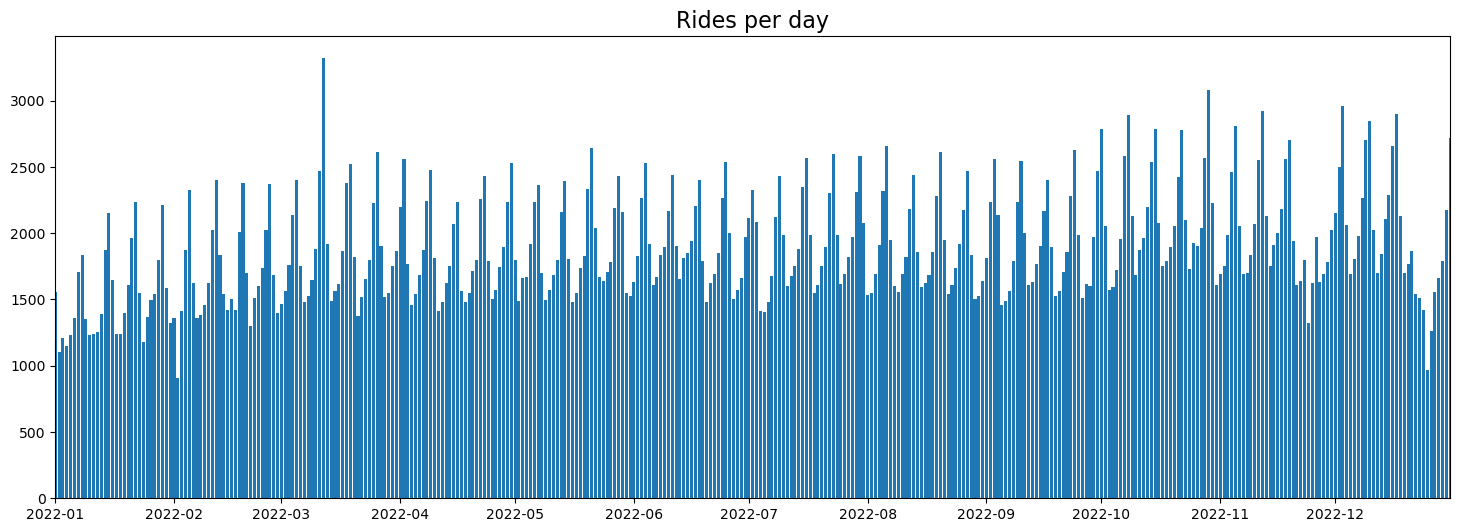

In [96]:
# Daily number of rides through the whole year
daily_rides = df.groupby('date').size().reset_index(name='daily_rides')

# Plot the daily rides
plt.figure(figsize=(18,6))
plt.bar(daily_rides['date'], daily_rides['daily_rides'])
plt.title('Rides per day', fontsize=16)
plt.xlim([min(daily_rides['date']), max(daily_rides['date'])]);



On the plot we first observe a periodic behaviour with peaks every 7 days. We also observe a significative decrease in the number of rides the last two weeks of the year during winter holidays.

We calculate the mean number of daily rides with a 95% confidence interval. We calculate the mean for the whole year and we also calculate it separately for the last two weeks (holidays).

Whole dataset
------------------------------------------
Mean number of rides per day: 1890.21
Standard deviation: 403.18
With a 95.0% confidence we can say that the error on the mean will be no more than 41.50 rides per day.

Holidays
--------------------------------------------------
Mean number of rides per day in holidays: 1719.00 +/- 426.72
With a 95.0% confidence we can say that the error on the mean will be no more than 246.38 rides per day during holidays


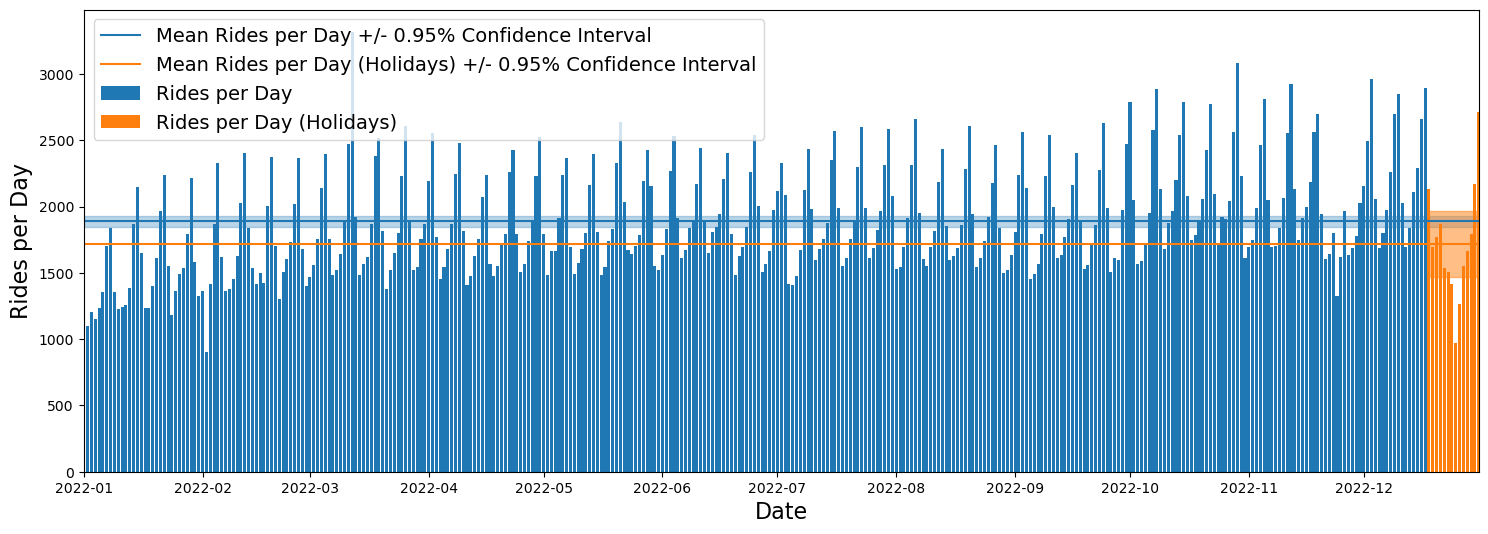

In [97]:
# Daily number of rides through the whole year
daily_rides = df.groupby('date').size().reset_index(name='daily_rides')

# Calculate the mean and standard deviation
mean_rides_per_day = daily_rides['daily_rides'].mean()
std_rides_per_day = daily_rides['daily_rides'].std()

print('Whole dataset\n------------------------------------------')
print(f'Mean number of rides per day: {mean_rides_per_day:.2f}')
print(f'Standard deviation: {std_rides_per_day:.2f}')

## Calculate the 95% interval confidence of the mean
confidence = 0.95

# t-critical value
critical_value = scipy.stats.t.ppf(1 - (1-confidence)/2, df=(len(daily_rides) - 1))

# Calculate the confidence interval
conf_interval = critical_value * std_rides_per_day / np.sqrt(len(daily_rides))

print(f"With a {100 * confidence}% confidence we can say that the error on the mean will be no more than {conf_interval:.2f} rides per day.")

daily_rides_holidays = daily_rides[daily_rides['date'] > '2022-12-17']

# Sample mean and standard deviation for holidays
mean_rides_per_day_holidays = daily_rides_holidays['daily_rides'].mean()
std_rides_per_day_holidays = daily_rides_holidays['daily_rides'].std()

print('\nHolidays\n--------------------------------------------------')
print(f'Mean number of rides per day in holidays: {mean_rides_per_day_holidays:.2f} +/- {std_rides_per_day_holidays:.2f}')

# Calculate the confidence interval
critical_value_holidays = scipy.stats.t.ppf(1 - (1 - confidence)/2, df=(len(daily_rides_holidays) - 1))
conf_interval_holidays = critical_value_holidays * std_rides_per_day_holidays / np.sqrt(len(daily_rides_holidays))

print(f"With a {100 * confidence}% confidence we can say that the error on the mean will be no more than {conf_interval_holidays:.2f} rides per day during holidays")

# Plot the histogram of the daily rides, the mean and the confidence interval
plt.figure(figsize=(18,6))
plt.bar(daily_rides['date'], daily_rides['daily_rides'], label='Rides per Day')
plt.axhline(y=mean_rides_per_day, color='C0', label=f'Mean Rides per Day +/- {confidence}% Confidence Interval')
plt.fill_between(daily_rides['date'], mean_rides_per_day-conf_interval,
                 mean_rides_per_day+conf_interval, color='C0', alpha=0.3)

# Plot the histogram of the daily rides, the mean and the confidence interval for the holiday season
plt.bar(daily_rides_holidays['date'], daily_rides_holidays['daily_rides'], label='Rides per Day (Holidays)')
plt.axhline(y=mean_rides_per_day_holidays, color='C1', label=f'Mean Rides per Day (Holidays) +/- {confidence}% Confidence Interval')

plt.fill_between(daily_rides_holidays['date'], mean_rides_per_day_holidays-conf_interval_holidays,
                 mean_rides_per_day_holidays+conf_interval_holidays, color='C1', alpha=0.5)

plt.ylabel('Rides per Day', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.xlim(min(daily_rides['date']), max(daily_rides_holidays['date']))
plt.legend(fontsize=14)
plt.show()

## 5. Are there more rides on Fridays and Saturdays than other days of the week? Two Sample t-test

As we mentioned before there is a pattern of periodic peaks with period of 7 days. This make us think that there are probably more rides on some days of the week than others. 

We group rides on weekdays and calculate the mean and standard deviation of the daily number of rides.

In [103]:
# Create weekday column
daily_rides['weekday'] = daily_rides['date'].dt.day_name()

# Group by weekday
weekday_summary = daily_rides.groupby('weekday')['daily_rides'].describe()

# Reorder the series given weekdays
WEEKDAYS = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_summary = weekday_summary.reindex(WEEKDAYS)
weekday_summary

count         mean         std     min      25%     50%      75%  \
weekday                                                                       
Monday      52.0  1517.730769  144.254013  1182.0  1456.00  1524.5  1609.25   
Tuesday     52.0  1586.134615  162.524330  1150.0  1523.50  1571.0  1671.75   
Wednesday   52.0  1687.480769  204.303455   906.0  1623.75  1693.5  1777.00   
Thursday    52.0  1837.692308  217.195000  1326.0  1777.00  1862.5  1944.50   
Friday      52.0  2225.557692  250.709301  1509.0  2135.00  2235.5  2357.00   
Saturday    53.0  2503.547170  330.772846  1418.0  2394.00  2528.0  2659.00   
Sunday      52.0  1861.500000  250.469637   969.0  1765.25  1910.0  2039.75   

              max  
weekday            
Monday     1750.0  
Tuesday    1925.0  
Wednesday  2108.0  
Thursday   2290.0  
Friday     2702.0  
Saturday   3320.0  
Sunday     2230.0

It seems that there are more rides on Fridays and Saturdays than the rest of the days. We will perform a hypothesis test to find out whether this difference is a normal fluctuation or these days are actually special cases.

Our null-hypothesis will be that every weekday is the same and the population mean of rides is the same for every weekday. The alternative hypothesis will be that the population mean of rides is bigger on Fridays and Saturdays.

In [28]:
# Take the two samples
fridays_and_saturdays = daily_rides[daily_rides['weekday'].isin(['Friday', 'Saturday'])].daily_rides
other_days = daily_rides[daily_rides['weekday'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Sunday'])].daily_rides

print(f"Number of datapoints for Fridays and Saturdays: {len(fridays_and_saturdays)}")
print(f"Number of datapoints for other days: {len(other_days)}")

# Compute t-test
scipy.stats.ttest_ind(a=fridays_and_saturdays, b=other_days, alternative='greater')

Number of datapoints for Fridays and Saturdays: 105
Number of datapoints for other days: 260


TtestResult(statistic=21.655184088300548, pvalue=1.17467499279095e-67, df=363.0)

The test provides a very small p-value, so we can reject the null hypothesis and affirm that **people actually take more rides on Fridays and Saturdays** even with very tiny significance levels.

## 6. Conclusions
- There are more tippers in the early morning and from 15 to 18 hours
- Tips increase with fare, which is higher for longer trips.
- Tips are slightly higher in the morning hours, as longer trips occur then, probably to or from the city airport.
- The percentage of tippers is higher in rides starting at the airport and tips are also higher in average.
- Weekdays do not seem to affect the probability of getting tipped or the probability of getting higher tips on a ride, but there are certainly more rides on those days of the week.
- The mean daily rides is 1890 +/- 41 number of rides the whole year and during winter holidays it is 1719 +/- 246 number of rides with a 95% interval of confidence.